## Outliers and Impact on Machine Learning

##### Which Machine Learning Models Are Sensitive To Outliers?
1. Naive Bayes Classifier                  ---Not sensitive to outliers
2. SVM                                     ---Not sensitive to outliers
3. Linear Regression                       ---Sensitive to outliers
4. Logistic Regression                     ---Sensitive to outliers
5. Decision Tree Regressor or Classifier   ---Not sensitive to outliers
6. Ensemble(RF, XGboost, GB)               ---Not sensitive to outliers
7. KNN                                     ---Not Sensitive to outliers
8. KMeans                                  ---Sensitive to outliers
9. Hierarichal                             ---Sensitive to outliers
10. PCA                                    ---Sensitive to outliers
11. Neural Networks                        ---Sensitive to outliers

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
import seaborn as sns

/home/surajkarki/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

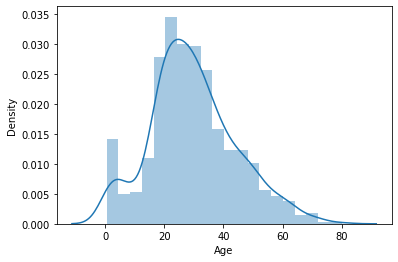

In [28]:
sns.distplot(df["Age"].dropna())

/home/surajkarki/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

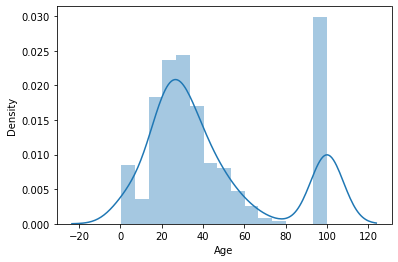

In [29]:
sns.distplot(df["Age"].fillna(100))

Text(0, 0.5, 'No of passenger')

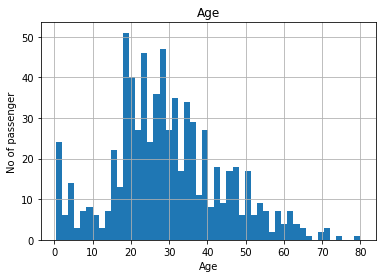

In [30]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

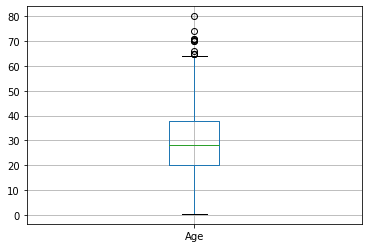

In [31]:
figure = df.boxplot(column="Age")

In [32]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Assuming age follows a gaussian distribution we will calculate  boundaries which differentiates the outliers

In [33]:
upper_boundary = df['Age'].mean() + 3 * df["Age"].std()
lower_boundary = df['Age'].mean() - 3 * df["Age"].std()

In [34]:
print(lower_boundary), print(upper_boundary), print(df.Age.mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

### If features are skewed we use the below technique

Text(0, 0.5, 'No of passenger')

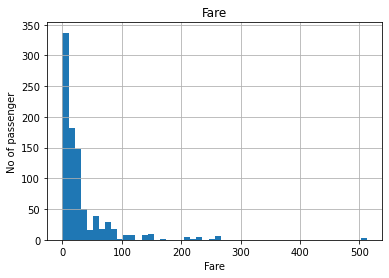

In [38]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

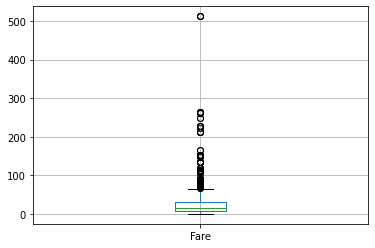

In [39]:
figure = df.boxplot(column="Fare")

In [40]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [41]:
### Lets compute the inter-quantile range to compute boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [42]:
# Extreme outliers
lower_bridge = df["Fare"].quantile(0.25) - (IQR*3)
higher_bridge = df["Fare"].quantile(0.75) + (IQR*3)

In [43]:
print(lower_bridge), print(higher_bridge)

-61.358399999999996
100.2688


(None, None)

In [44]:
data = df.copy()

In [45]:
data.loc[data["Age"]>=73, "Age"] = 73   # 73 is outlier

In [47]:
data.loc[data["Fare"]>=100, "Fare"] = 100  # 100 is outlier

Text(0, 0.5, 'No of passenger')

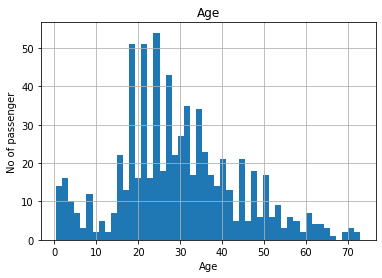

In [48]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

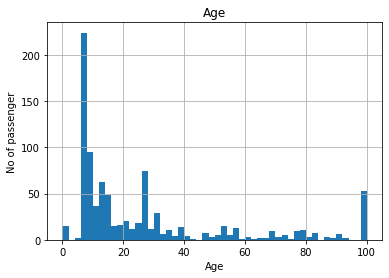

In [49]:
figure = data.Fare.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["Age", "Fare"]].fillna(0), data["Survived"], test_size=0.3)

In [52]:
X_train.head()

,Age,Fare
529,23.0,11.5000
662,47.0,25.5875
887,19.0,30.0000
756,28.0,7.7958
493,71.0,49.5042


In [59]:
### Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [60]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc score: {}".format(roc_auc_score(y_test, y_pred1[:, 1])))

Accuracy score: 0.6716417910447762
roc_auc score: 0.6780061422159226
